# PRACTICAL-3: Write program to perform the DFT of 4x4 Gray Scale Image.

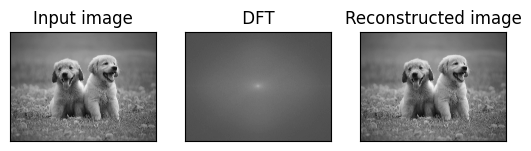

In [1]:
#importing packages 
import numpy as np
import cv2
from matplotlib import pyplot as plt

#getting the input image and convert to grayscale 
img = cv2.imread('F:/GitHub/Practical_BscIT_MscIT_Ninad/MscIT/Semester 2/ImageProcessing/Dataset/Dog.jpg', 0)

# Transform the image to improve the speed in the Fourier transform calculation
rows, cols = img.shape
optimalRows = cv2.getOptimalDFTSize(rows)
optimalCols = cv2.getOptimalDFTSize(cols)
optimalImg = np.zeros((optimalRows, optimalCols))
optimalImg[:rows, :cols] = img

# Calculate the discrete Fourier transform
dft = cv2.dft(np.float32(optimalImg), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

# output of CV2.dft() function will be 3-D numpy array, for 2-D Output, 2D DFT as two-part complex and real part.
f_complex = dft_shift[:, :, 0] + 1j * dft_shift[:, :, 1]
f_abs = np.abs(f_complex) + 1 # lie between 1 and 1e6
f_bounded = 20 * np.log(f_abs)
f_img = 255 * f_bounded / np.max(f_bounded)
f_img = f_img.astype(np.uint8)


# Reconstruct the image using the inverse Fourier transform
i_shift = np.fft.ifftshift(dft_shift)
result = cv2.idft(i_shift)
result = cv2.magnitude(result[:, :, 0], result[:, :, 1])

# #Displaying input image, grayscale image, DFT of the Input Image 
images = [optimalImg, f_img, result]
imageTitles = ['Input image', ' DFT ', 'Reconstructed image']

for i in range(len(images)):
    plt.subplot(1, 3, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(imageTitles[i])
    plt.xticks([])
    plt.yticks([])
plt.show()
# for hold the Display until key press 
cv2.waitKey()
cv2.destroyAllWindows()